# Datasets gausianas

Creamos un dataset con una gausiana y 4 clases

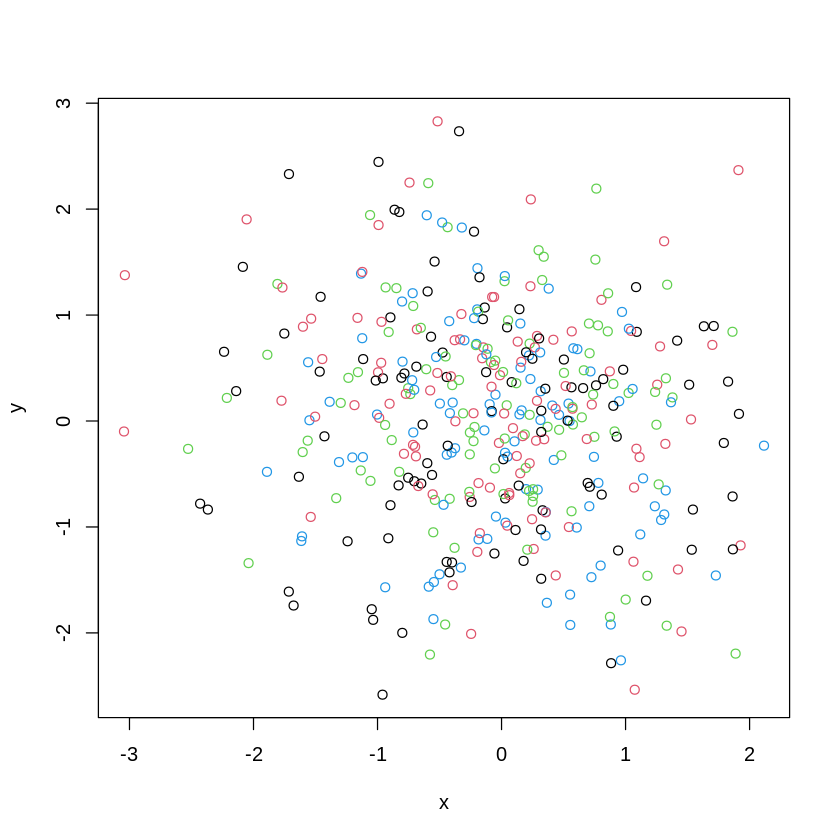

In [2]:
tot.puntos <- 100
x<-rnorm(4*tot.puntos,)
y<-rnorm(4*tot.puntos)
gausianas_mezcladas<-cbind(x,y,rep(1:4,tot.puntos))
plot(gausianas_mezcladas[,1:2],col=gausianas_mezcladas[,3])

Creamos un dataset con 4 gausianas con distintos centros

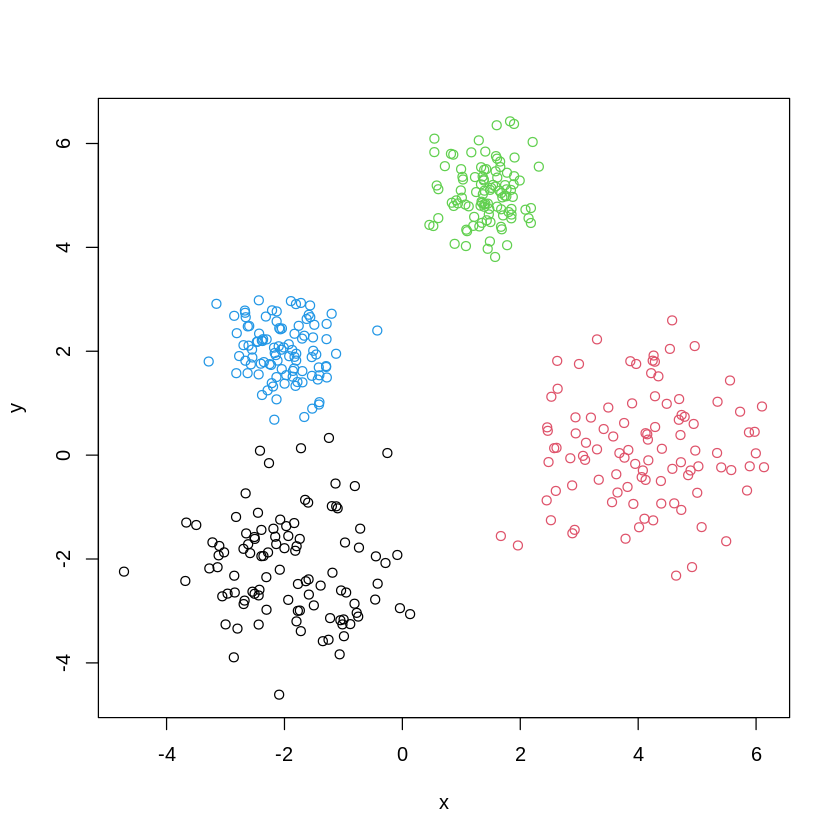

In [3]:
#cuatro clusters de dist. gaussianas
tot.puntos<-100
gap=2
x<-rnorm(tot.puntos,mean=-gap)
y<-rnorm(tot.puntos,mean=-gap)
gausianas<-cbind(x,y,rep(1,length(x)))
x<-rnorm(tot.puntos,mean=2*gap)
y<-rnorm(tot.puntos,mean=0)
gausianas<-rbind(gausianas,cbind(x,y,rep(2,length(x))))
x<-rnorm(tot.puntos,mean=0.7*gap,sd=0.5)
y<-rnorm(tot.puntos,mean=2.5*gap,sd=0.5)
gausianas<-rbind(gausianas,cbind(x,y,rep(3,length(x))))
x<-rnorm(tot.puntos,mean=-gap,sd=0.5)
y<-rnorm(tot.puntos,mean=gap,sd=0.5)
gausianas<-rbind(gausianas,cbind(x,y,rep(4,length(x))))
plot(gausianas[,1:2],col=gausianas[,3])

# Análisis crabs y lampone (kmeans y hclust)

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

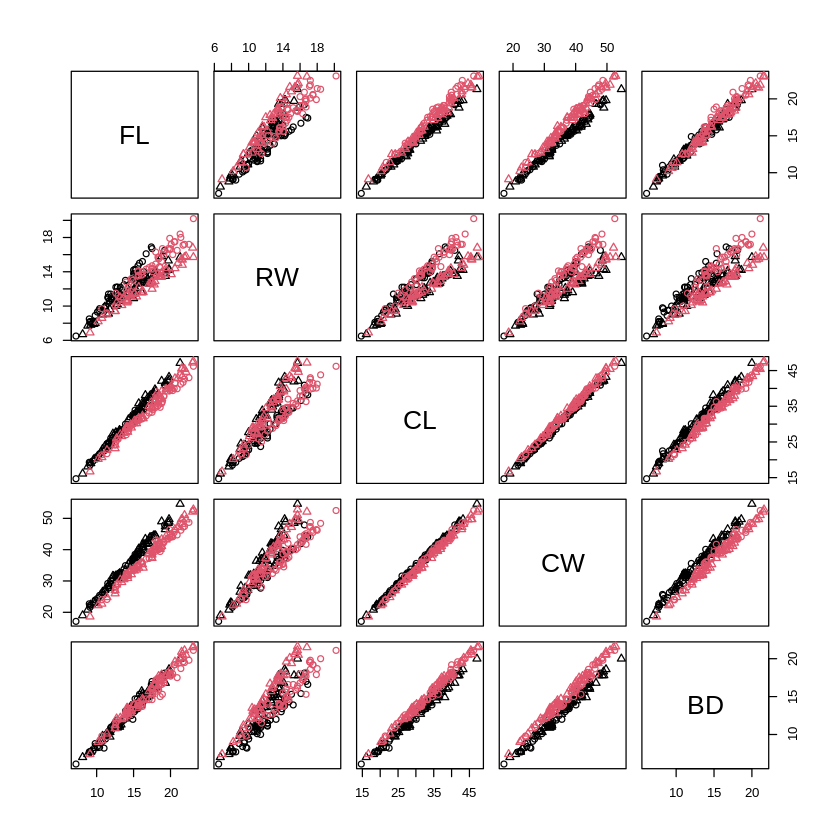

In [4]:
library(MASS)
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))

Inicialmente, se observa que los datos están estirados sobre una recta y no se ven claramente clusters circulares. Es por ello que se realizará un escalado mediante el logaritmo y además se aplicará una PCA. De esta manera se podrá conseguir una mejor proyección de los datos, desde la cual poder obtener las distintas clases mediante clustering.

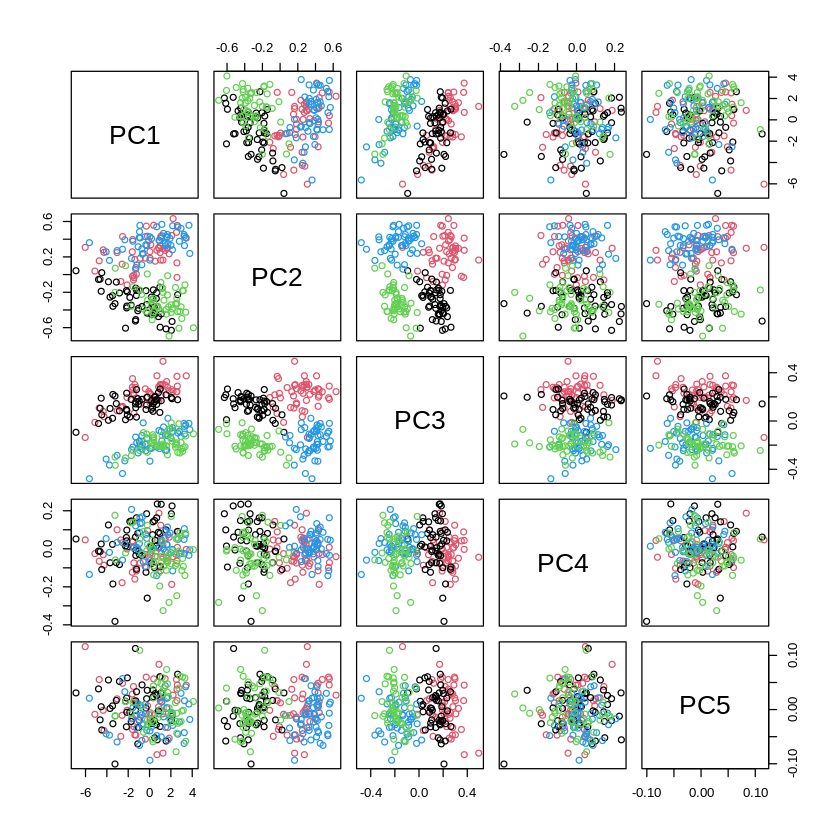

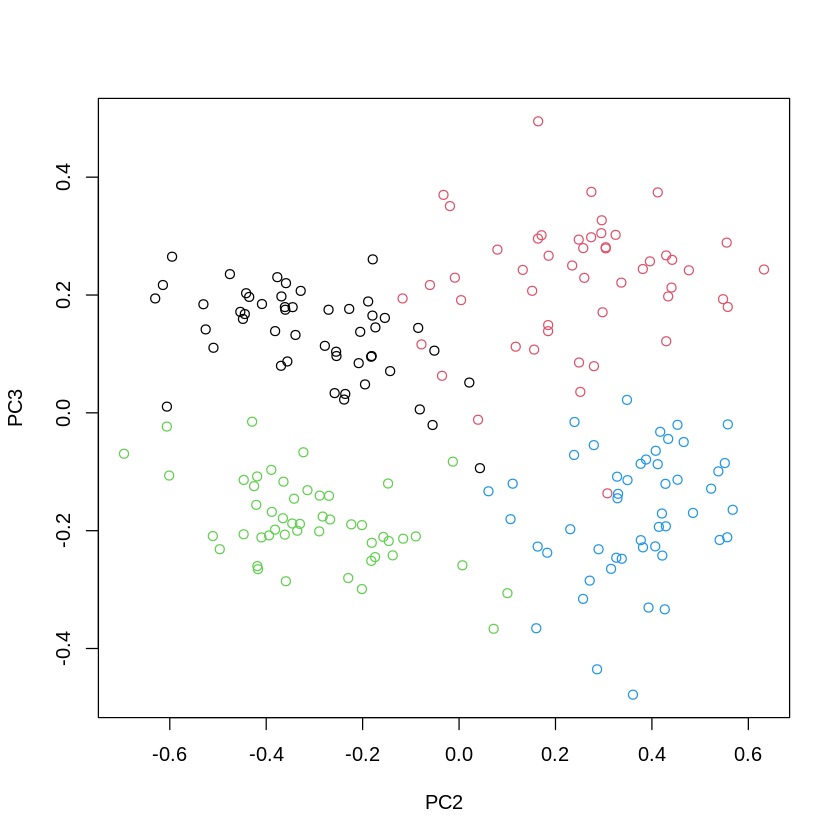

In [6]:
library(MASS)

crabs_data <- crabs[,4:8];

crabs_data <- log(crabs_data+1)

crabs_data.pca <- prcomp(crabs_data, scale=TRUE)

crabs_data.class <- factor(paste(crabs$sp,crabs$sex,sep="-"))

pairs(crabs_data.pca$x, col=crabs_data.class)

plot(crabs_data.pca$x[,2:3], col=crabs_data.class)

Con las componentes principales 2 y 3 se pueden ver claramente 4 clusters.

In [7]:
install.packages("e1071")
library(e1071)

compare_clustering_solution <- function(class, clusters) {
  cont.table <- table(class, clusters)
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  print(cont.table[,class.match])
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [8]:
kmeans_crabs <- kmeans(crabs_data.pca$x[,2:3], centers = 4, nstart = 10)

compare_clustering_solution(crabs_data.class, kmeans_crabs$cluster)

dist_crabs_data <- dist(crabs_data.pca$x[,2:3])

hc_data <- hclust(dist_crabs_data, method = "complete")

clusters_hc <- cutree(hc_data, k = 4)

compare_clustering_solution(crabs_data.class, clusters_hc)

Direct agreement: 4 of 4 pairs
Cases in matched pairs: 92.5 %
     clusters
class  1  4  2  3
  B-F 48  0  1  1
  B-M  8 40  0  2
  O-F  0  0 47  3
  O-M  0  0  0 50
Direct agreement: 3 of 4 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 73 %
     clusters
class  4  3  2  1
  B-F 14  0 35  1
  B-M  0 42  7  1
  O-F  3  0 44  3
  O-M  0  4  0 46


Ahora aplicamos los métodos de clustering al dataset crabs. Con kmeans se obtiene un resultado muy bueno, esto es porque ese método divide el espacio en "círculos" (dependiendo la dimensión) y esa es la forma que toman los datos luego de aplicar la PCA.

Para clustering jerárquico, el resultado es un poco peor. Aunque se puede notar que los clusters obtenidos dividen muy bien la clase "sexo". En el dendograma, la primera ramificación dividirá esa clase.

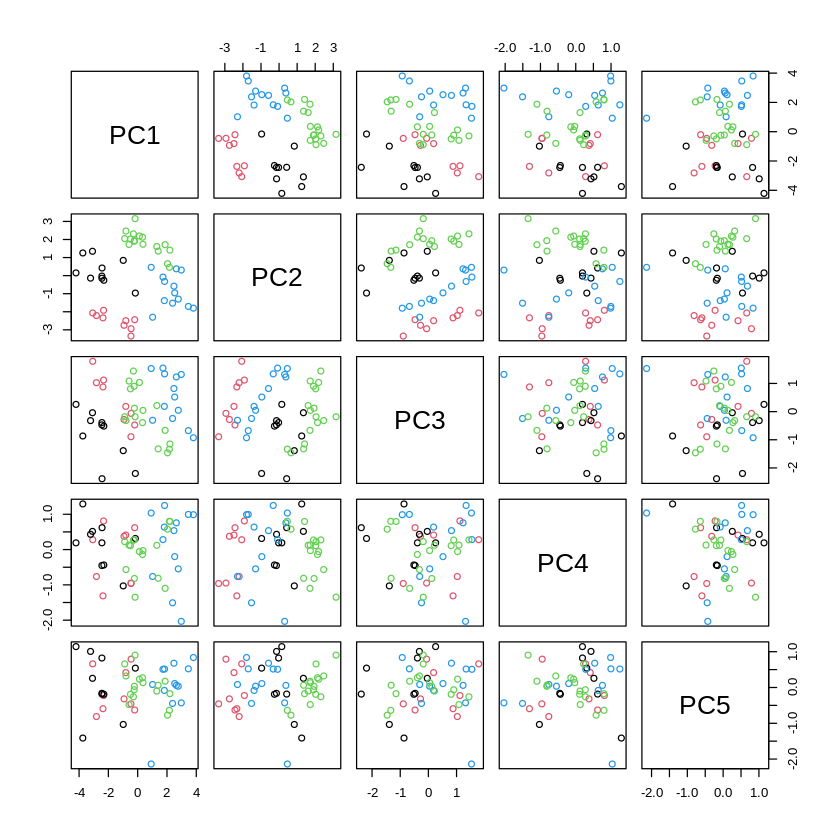

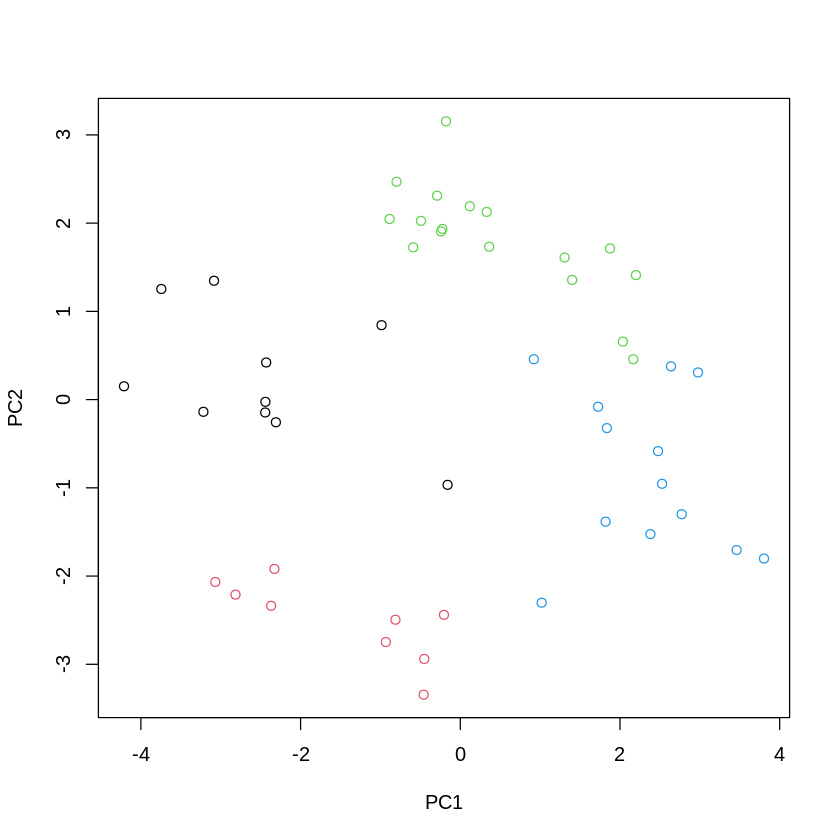

In [10]:
load("lampone.Rdata")

lampone$Numero <- as.numeric(lampone$Numero)

lampone[,-c(1,143)] <- log(lampone[,-c(1,143)] + 1)

lampone.pca <- prcomp(lampone[,-c(1,143)], scale=FALSE)

lampone.class <- factor(paste(lampone$anno,lampone$N_tipo,sep="-"))

pairs(lampone.pca$x[,1:5], col=lampone.class)

plot(lampone.pca$x[,1:2], col=lampone.class)

Para el dataset "lampone" se realiza un escalado logarítmico y una PCA para obtener una mejor vista de los datos. Es importante notar que el dataset contiene pocas filas y debido a ello algunos métodos no podrán llegar a soluciones buenas.

Sin embargo, con las transformaciones realizadas se consiguen ver 4 clusters. A continuación se intenta obtenerlos mediante kmeans y clustering jerárquico.

In [11]:
kmeans_lampone <- kmeans(lampone.pca$x, centers = 4, nstart = 10)

compare_clustering_solution(lampone.class, kmeans_lampone$cluster)

dist_lampone <- dist(lampone.pca$x[,1:2])

hc_data <- hclust(dist_lampone, method = "complete")

clusters_hc <- cutree(hc_data, k = 4)

compare_clustering_solution(lampone.class, clusters_hc)

Direct agreement: 4 of 4 pairs
Cases in matched pairs: 87.76 %
         clusters
class      4  3  1  2
  2006-10  8  1  1  0
  2006-2   0  9  0  0
  2007-10  0  0 14  3
  2007-2   0  1  0 12
Direct agreement: 3 of 4 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 73.47 %
         clusters
class      1  2  3  4
  2006-10  8  1  1  0
  2006-2   4  5  0  0
  2007-10  0  0 11  6
  2007-2   0  1  0 12


A pesar de la poca cantidad de datos, si los métodos se realizan sobre los datos transformados con la PCA, se consiguen dividir las clases mediante 4 clusters tanto para kmeans como para hclust.

# GAP Statistic

In [12]:
compute_gap_statistic <- function(data, max_k = 10, B = 50) {
  n <- nrow(data)

  # Quitamos las columnas que tengan varianza cero
  non_constant_columns <- apply(data, 2, function(col) var(col) > 0)
  data <- data[, non_constant_columns, drop = FALSE]

  if (ncol(data) == 0) {
    stop("All columns have zero variance; cannot perform PCA.")
  }

  # Realizamos una pca en los datos
  pca_result <- prcomp(data, center = TRUE, scale. = TRUE)
  pca_data <- pca_result$x

  # Calculamos la dispersión en los datos originales
  wss <- sapply(1:max_k, function(k) {
    kmeans_result <- kmeans(data, centers = k, nstart = 25)
    sum(kmeans_result$withinss)
  })
  log_wss <- log(wss)

  # Matriz para guardar W*_kb
  ref_log_wss <- matrix(NA, nrow = B, ncol = max_k)

  # Calculamos el bounding box pero de la PCA
  pca_mins <- apply(pca_data, 2, min)
  pca_maxs <- apply(pca_data, 2, max)

  for (b in 1:B) {
    # Genera el dataset de referencia dentro de la bounding box
    ref_pca_data <- sapply(1:ncol(pca_data), function(j) {
      runif(n, min = pca_mins[j], max = pca_maxs[j])
    })

    # Calculamos la dispersión para cada k en el dataset de referencia
    ref_log_wss[b, ] <- sapply(1:max_k, function(k) {
      ref_kmeans <- kmeans(ref_pca_data, centers = k, nstart = 25)
      sum(ref_kmeans$withinss)
    })
  }

  # Calculamos la GAP statistic
  ref_log_wss_mean <- colMeans(log(ref_log_wss))
  gap_stat <- ref_log_wss_mean - log_wss

  ref_log_wss_sd <- apply(log(ref_log_wss), 2, sd)
  gap_se <- sqrt(1 + 1 / B) * ref_log_wss_sd

  # Elegir el k óptimo
  optimal_k <- max_k
  for (k in 1:(max_k - 1)) {
    if (gap_stat[k] >= (gap_stat[k + 1] - gap_se[k + 1])) {
      optimal_k <- k
      break
    }
  }

  results <- list(gap_stat = gap_stat, gap_se = gap_se, optimal_k = optimal_k)
  return(results)
}

In [13]:
plot_gap_result <- function(gap_result) {
  plot(1:10, gap_result$gap_stat, type = "b", pch = 19, col = "blue",
     ylab = "GAP Stat", xlab = "Número de clusters (k)")
  segments(1:10, gap_result$gap_stat - gap_result$gap_se,
          1:10, gap_result$gap_stat + gap_result$gap_se, col = "black")
  abline(v = gap_result$optimal_k, col = "darkgreen", lty = 2)
}

Ahora con el método "GAP statistic" estimaremos la cantidad óptima de clusters para algunos datasets.

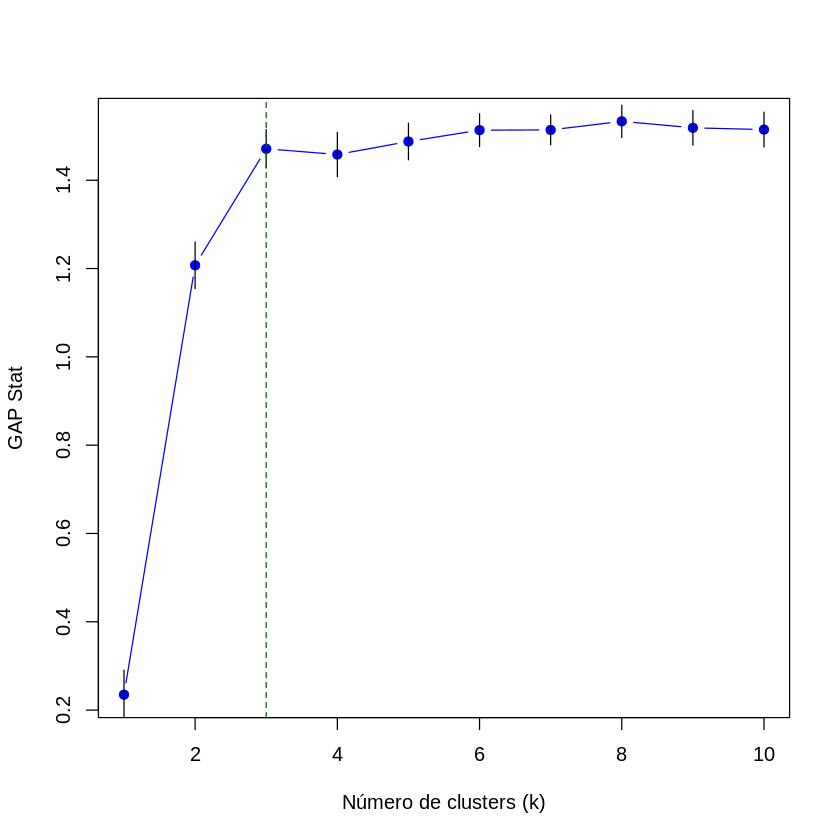

In [14]:
gap_result <- compute_gap_statistic(iris[,-5])

plot_gap_result(gap_result)

Para iris, se encuentra que la cantidad óptima de clusters según GAP es 3. Como ya se analizó este dataset sabemos que eso es correcto y hay 3 clases separadas en 3 clusters.

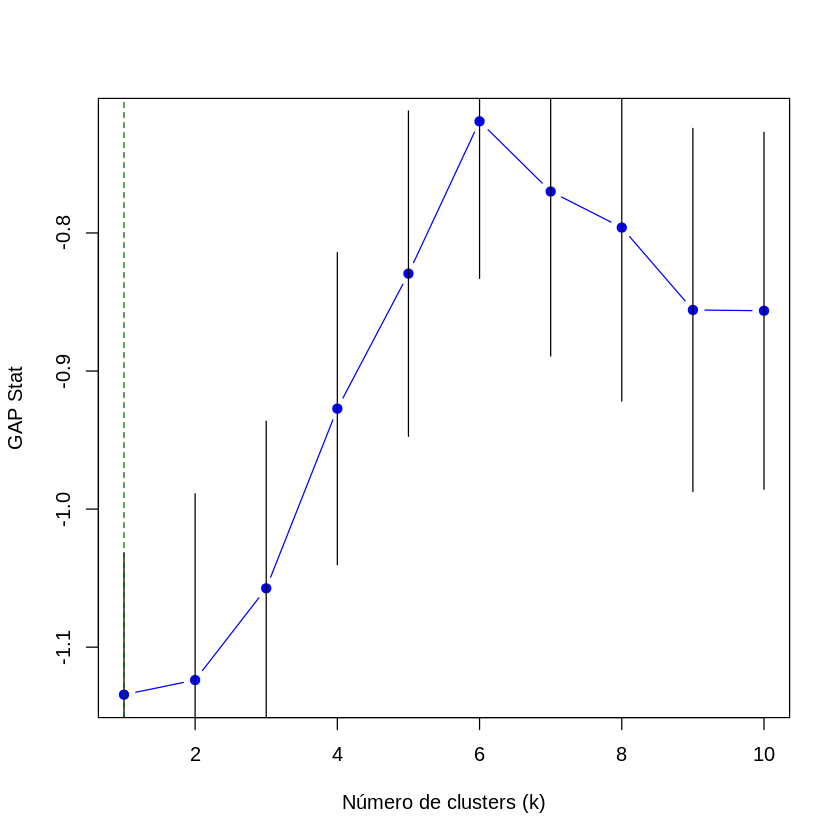

In [15]:
gap_result_pca <- compute_gap_statistic(lampone.pca$x[,1:2])

plot_gap_result(gap_result_pca)

Para el dataset "lampone" no se consigue que el número óptimo de clusters según GAP se corresponda con lo observado. Además las varianzas son muy grandes. Esto se podría deber a la poca cantidad de puntos del dataset.

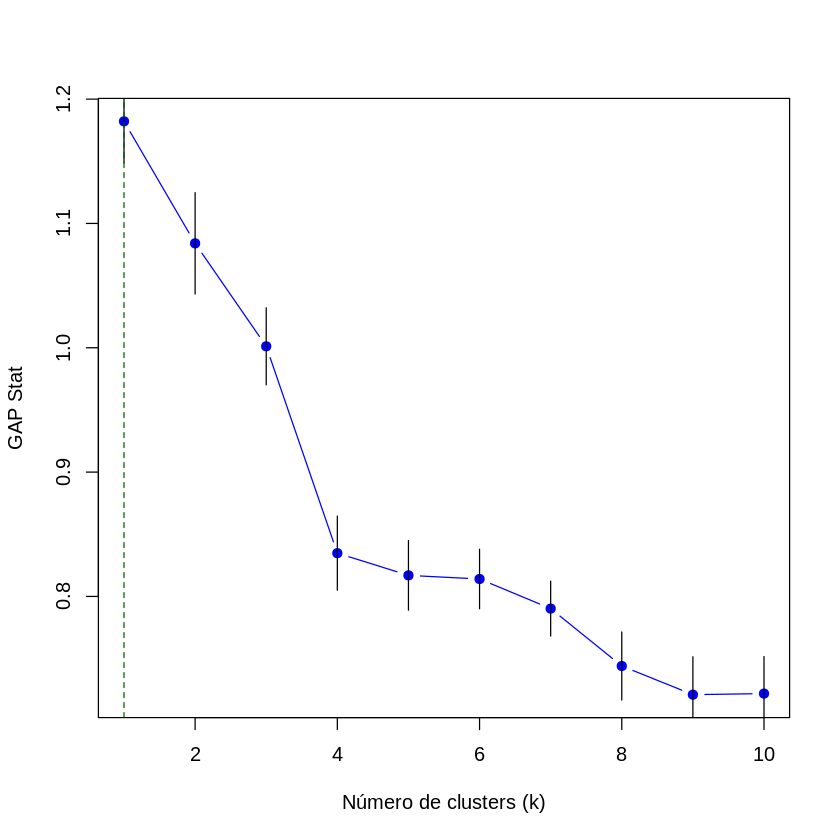

In [16]:
gap_result <- compute_gap_statistic(gausianas_mezcladas[,1:2])

plot_gap_result(gap_result)

Para el dataset de la gausiana con 4 etiquetas asignadas sin un criterio, se obtiene que el número óptimo de clusters es 1. Es decir que el dataset no contiene clusters, lo cual es correcto.

Warning message:
“did not converge in 10 iterations”


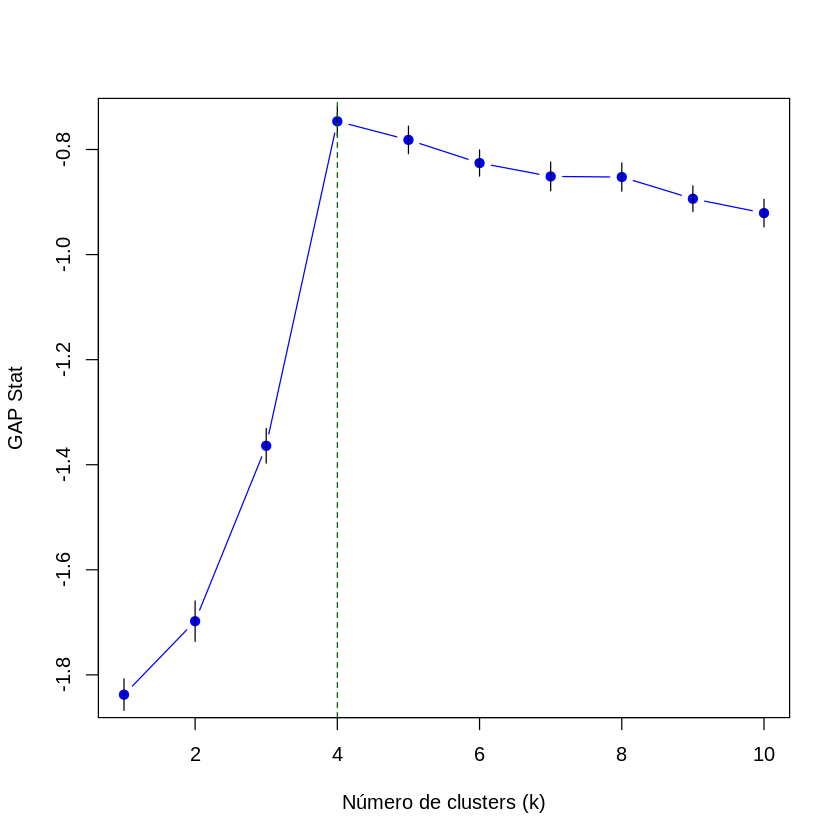

In [17]:
gap_result <- compute_gap_statistic(gausianas[,1:2])

plot_gap_result(gap_result)

Para el dataset de 4 gausianas con distintos centros se obtiene que el número óptimo es 4 como se podría esperar.

# Estabilidad

In [18]:
compare_clusters <- function(cc1, cc2, original_length, ind1, ind2) {
  v1<-v2<-rep(0,original_length)
  v1[ind1]<-cc1+5
  v2[ind2]<-cc2+5
  a<-sqrt(v1%*%t(v1))
  m1<-a / -a + 2*(a==round(a))
  m1[is.nan(m1)]<-0
  a<-sqrt(v2%*%t(v2))
  m2<-a / -a + 2*(a==round(a))
  m2[is.nan(m2)]<-0
  validos<-sum(v1*v2>0)
  score<-sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
  return(score)
}

subsample_kmeans <- function(data, k, n) {
  # Lista para guardar los resultados
  clustering_results <- vector("list", n)

  for (i in 1:n) {
    # Subsample del 90%
    subsample_indices <- sample(nrow(data), 0.9 * nrow(data))
    subsample_data <- data[subsample_indices,]

    # Aplicar kmeans
    kmeans_result <- kmeans(subsample_data, centers = k, nstart = 10)

    clustering_results[[i]] <- list(
      clusters = kmeans_result$cluster,
      centers = kmeans_result$centers,
      withinss = kmeans_result$withinss,
      indices = subsample_indices
    )
  }

  return(clustering_results)
}

calculate_similarity_scores <- function(cluster_list, data_rows_no) {
  # Para guardar los scores
  scores <- c()

  # Tomar todos los pares de clusters
  for (i in 1:(length(cluster_list) - 1)) {
    for (j in (i + 1):length(cluster_list)) {
      cluster1 <- cluster_list[[i]]$clusters
      cluster2 <- cluster_list[[j]]$clusters

      ind1 <- cluster_list[[i]]$indices
      ind2 <- cluster_list[[j]]$indices

      # Calcular la similitud entre los clusters y guardarla
      scores <- c(scores, compare_clusters(cluster1, cluster2, data_rows_no, ind1, ind2))
    }
  }

  return(scores)
}

compute_stability <- function(data, k = 10, no_replicas = 50) {
  n <- dim(data)[1]

  # Set up del plot
  plot(NULL, NULL, type = "n",
       xlab = "Similitud", ylab = "Acumulada",
       xlim = c(0.5,1), ylim = c(0, 1),
       main = "Distribución acumulada para distintos k")
  colors <- rainbow(k - 1)

  for (i in 2:k) {
    # Kmeans con subsampling, obtener scores de similitudes
    clusters <- subsample_kmeans(data, i, no_replicas)
    scores <- calculate_similarity_scores(clusters, n)

    # Generar histograma y plot acumulativo
    hist_data <- hist(scores, plot = FALSE)
    cumulative_counts <- cumsum(hist_data$counts)
    cumulative_probs <- cumulative_counts / sum(hist_data$counts)

    lines(hist_data$mids, cumulative_probs, type = "s",
          col = colors[i - 1], lwd = 2)
  }

  legend("bottomleft", legend = paste("k =", 2:k),
         col = colors, lwd = 2, title = "Clusters")
}

Ahora implementamos el método de estabilidad para determinar el número de clusters en los mismos datasets.

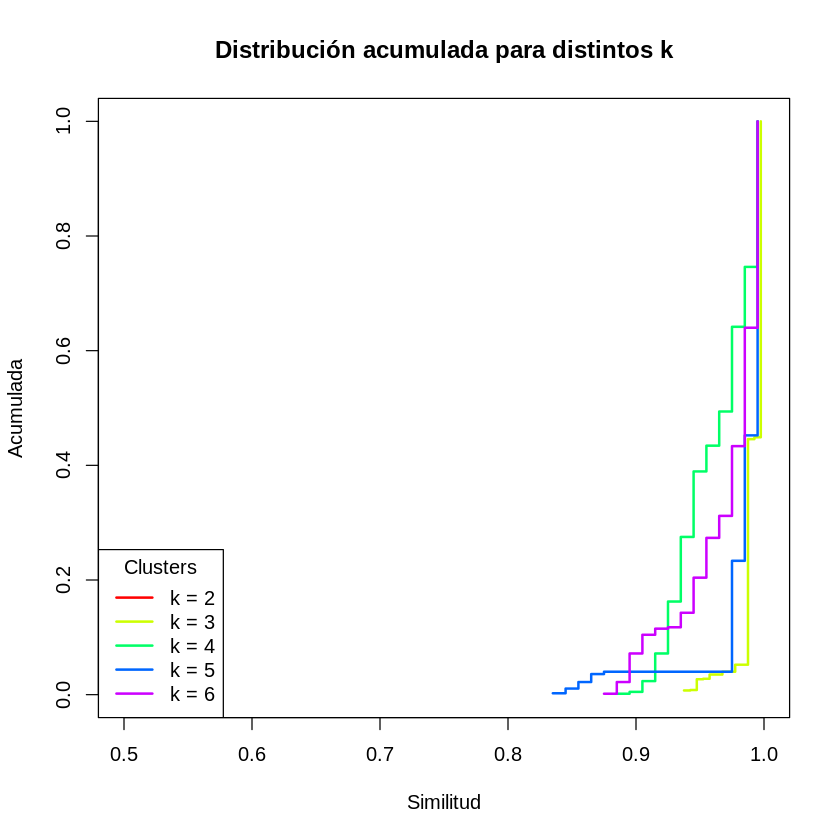

In [19]:
compute_stability(iris[,-5], k = 6)

Hay un k que se diferencia del resto y está más a la derecha. Para k=3 el pico de la acumulada se encuentra cerca de 1 y por eso es el valor con mayor estabilidad

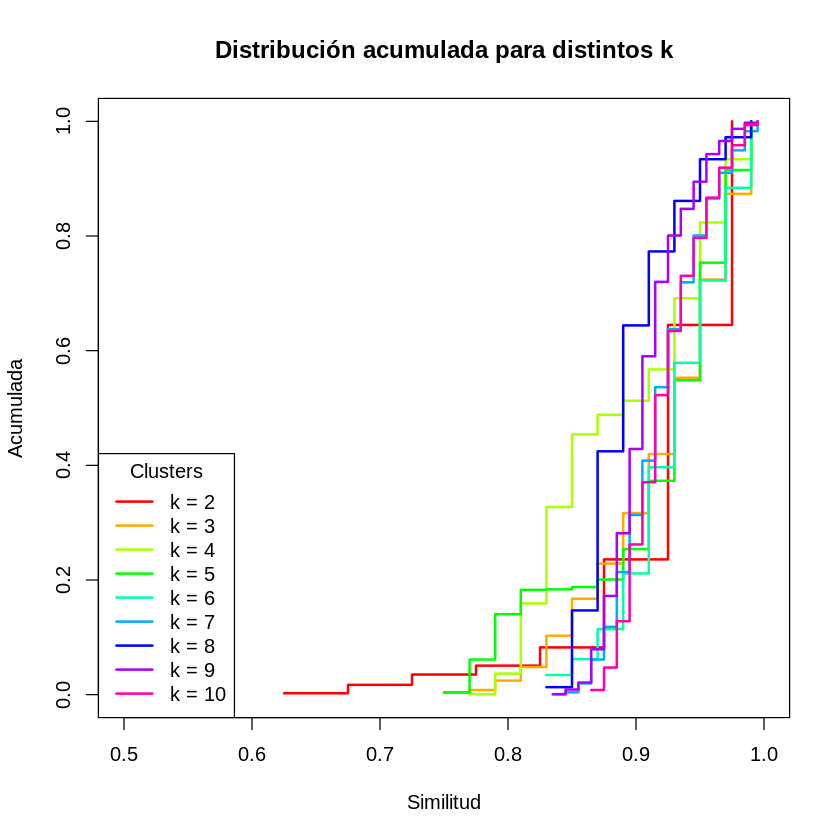

In [20]:
compute_stability(gausianas_mezcladas[,1:2])

Para un dataset en el que no hay clusters se ve que no hay un k que haga que la solución sea estable.

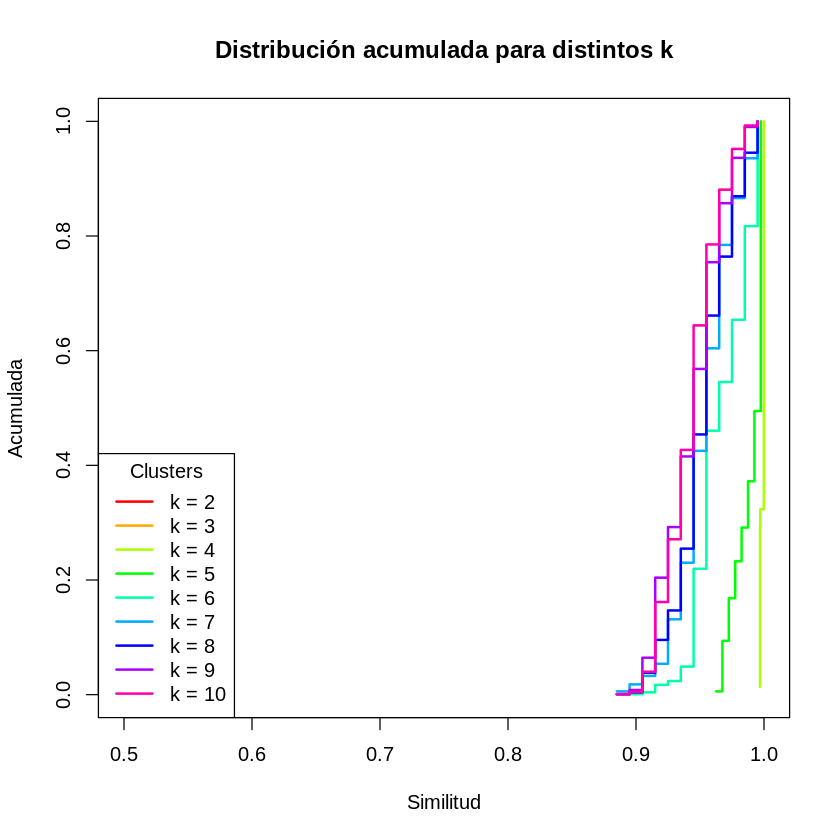

In [21]:
compute_stability(gausianas[,1:2])

Para el dataset de las 4 gausianas la solución con 4 clusters es la más estable con diferencia al resto.

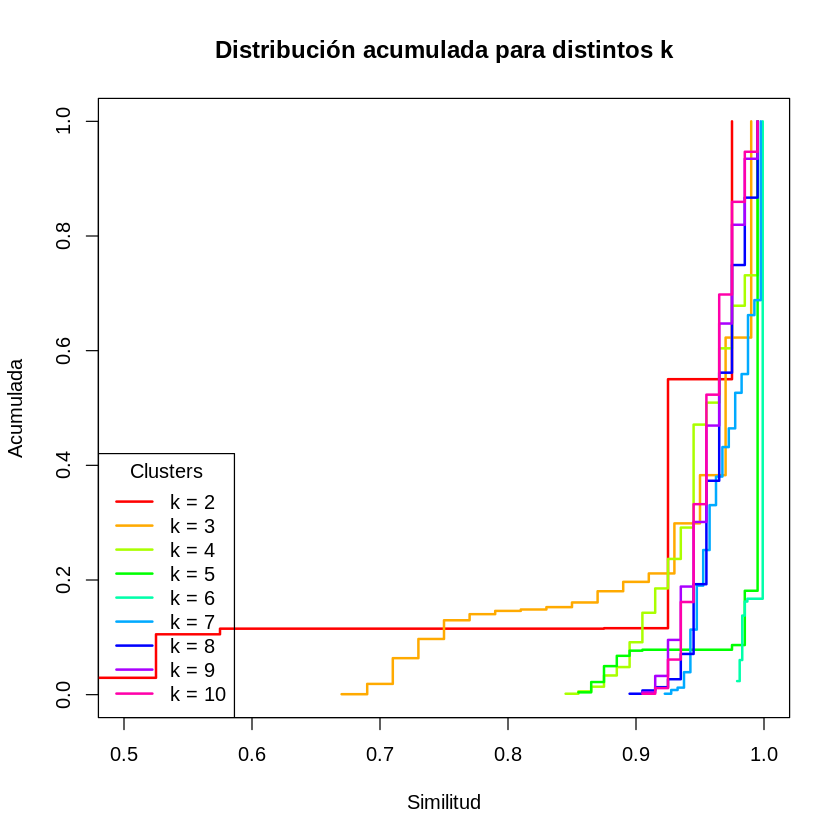

In [22]:
compute_stability(lampone.pca$x[,1:2])

En este caso los números más estables fueron 5 y 6. Lo cual no se corresponde con la cantidad de clusters que se observaron anteriormente. Las demás soluciones son inestables. Este resultado se debe a la poca cantidad de puntos del dataset. Además el método implementado usa subsampling para crear las réplicas, lo cual empeora aún más el problema de tener pocos datos.

# Análisis de dataset de semillas

Se eligió el dataset seeds, disponible en http://archive.ics.uci.edu/dataset/236/seeds.
Cuenta con 210 instancias, 3 clases y 7 variables descriptas a continuación:
1. area A,

2. perimeter P,

3. compactness C = 4*pi*A/P^2,

4. length of kernel,

5. width of kernel,

6. asymmetry coefficient

7. length of kernel groove.

Para correr las siguientes celdas se debe cargar el archivo seeds_dataset.txt disponible en el link.

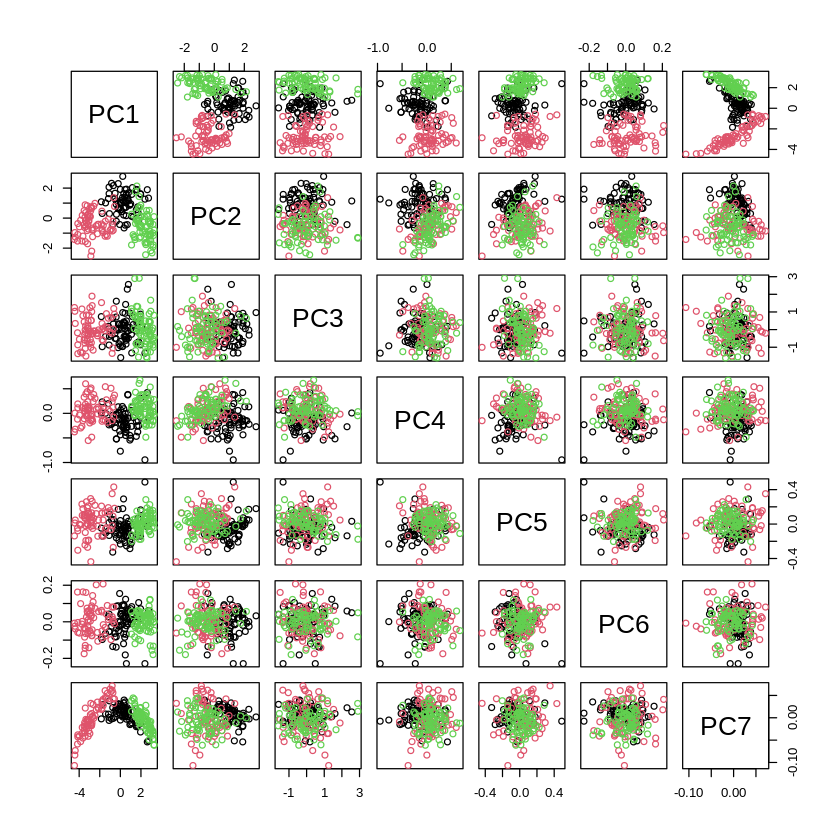

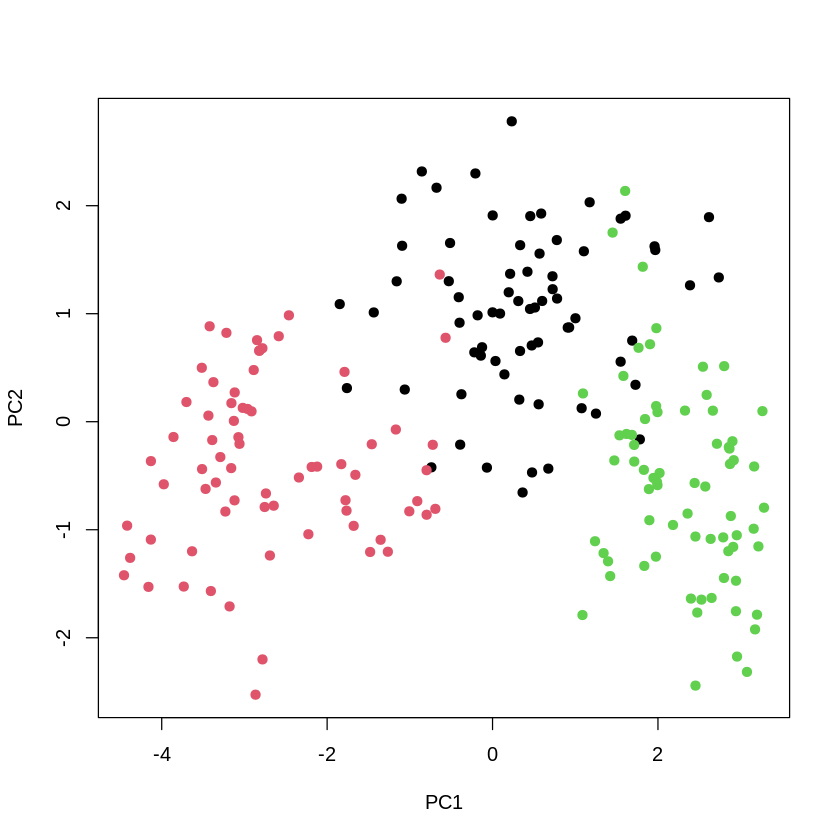

In [23]:
seeds <- read.table("seeds_dataset.txt", header = TRUE, sep = "", stringsAsFactors = FALSE)

seeds.class <- seeds[,8]

seeds.pca <- prcomp(seeds[,-8], scale. = TRUE)

pairs(seeds.pca$x, col = seeds.class)
plot(seeds.pca$x[,1:2], col = seeds.class, pch = 19)

Realizando una PCA de los datos descubrimos que las 2 primeras componentes principales describen 3 clusters que separan las clases.

In [27]:
kmeans_seeds <- kmeans(seeds.pca$x, centers = 3)

compare_clustering_solution(seeds.class, kmeans_seeds$cluster)

dist_seeds_data <- dist(seeds.pca$x)

hc_data <- hclust(dist_seeds_data, method = "complete")

clusters_hc <- cutree(hc_data, k = 3)

compare_clustering_solution(seeds.class, clusters_hc)

Direct agreement: 3 of 3 pairs
Cases in matched pairs: 92.34 %
     clusters
class  2  3  1
    1 62  2  5
    2  5 65  0
    3  4  0 66
Direct agreement: 3 of 3 pairs
Cases in matched pairs: 87.56 %
     clusters
class  1  2  3
    1 47  2 20
    2  4 66  0
    3  0  0 70


Ambos métodos de clustering consiguen resultados buenos utlizando la transformación de la PCA.

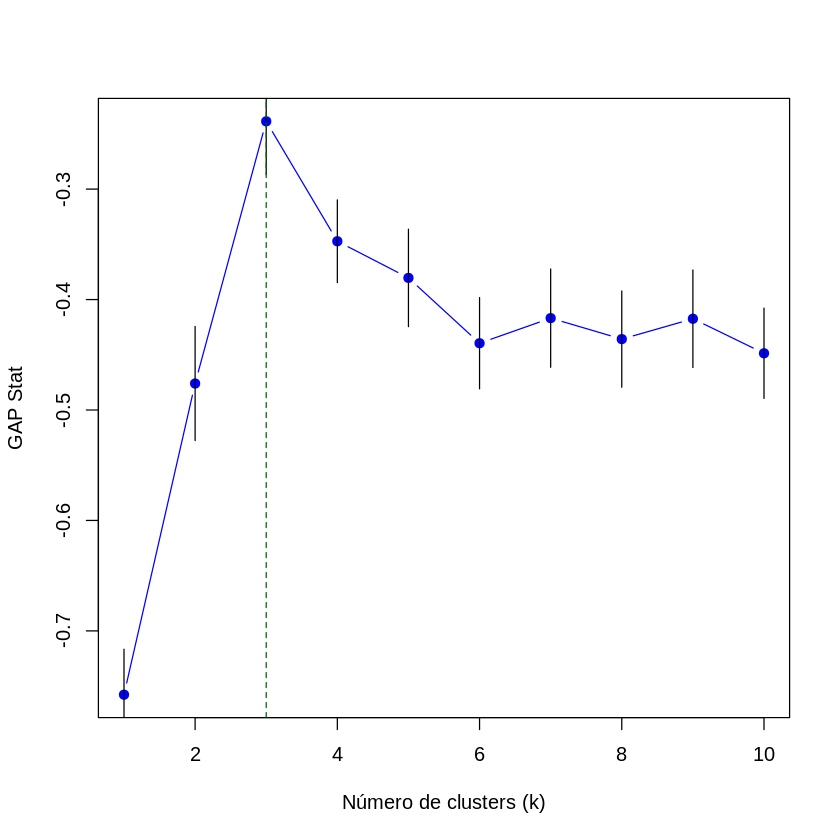

In [28]:
gap_result <- compute_gap_statistic(seeds.pca$x[,1:2])

plot_gap_result(gap_result)

Con el método GAP obtenemos que el número de clusters óptimo es 3.

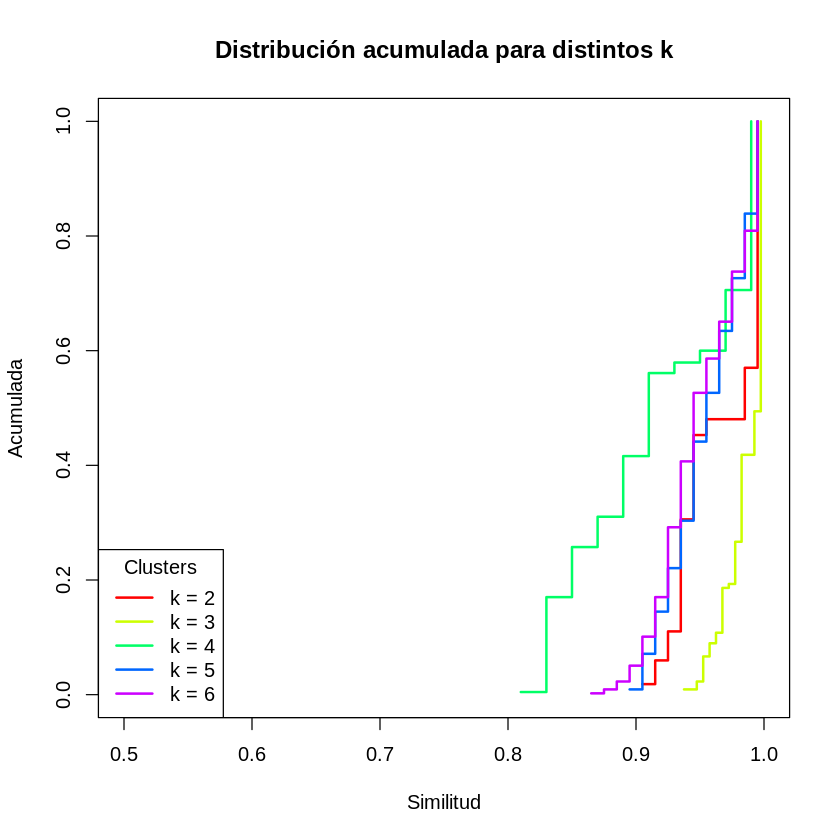

In [29]:
compute_stability(seeds[,-8], k=6, no_replicas = 30)

También la solución más estable es con 3 clusters.